In [ ]:
# importação de dados
import pandas as pd
df = pd.read_csv('admission_dataset.csv')
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,315,105,3,2.0,2.5,8.48,0,0.75
1,321,112,5,5.0,5.0,9.06,1,0.86
2,327,103,3,4.0,4.0,8.30,1,0.74
3,305,112,3,3.0,3.5,8.65,0,0.71
4,297,96,2,2.5,1.5,7.89,0,0.43
...,...,...,...,...,...,...,...,...
395,320,111,4,4.5,3.5,8.87,1,0.85
396,305,103,2,2.5,3.5,8.13,0,0.59
397,305,107,2,2.5,2.5,8.42,0,0.71
398,320,104,3,3.0,2.5,8.57,1,0.74


In [ ]:
# verificar se há dados faltantes e outras informações:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [ ]:
# análise estatística descritiva:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
# separar entras e saída do modelo:
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']
# separar em treino e tese:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)
# confirmando a estratificação:
print(f'Média de treino: {y_treino.mean()}')
print(f'Média de teste: {y_teste.mean()}')

Média de treino: 0.7265714285714285
Média de teste: 0.7191666666666666


In [ ]:
# criação dos modelos:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
modelo_rl = linear_model.LinearRegression(fit_intercept=True)
modelo_ad = tree.DecisionTreeRegressor(random_state=42)
modelo_rf = ensemble.RandomForestRegressor(random_state=42)
# treino dos modelos:
modelo_rl.fit(X_treino, y_treino)
modelo_ad.fit(X_treino, y_treino)
modelo_rf.fit(X_treino, y_treino)

RandomForestRegressor(random_state=42)

In [ ]:
# previsões de treino e de teste:
previsao_rl_treino = modelo_rl.predict(X_treino)
previsao_ad_treino = modelo_ad.predict(X_treino)
previsao_rf_treino = modelo_rf.predict(X_treino)

previsao_rl_teste = modelo_rl.predict(X_teste)
previsao_ad_teste = modelo_ad.predict(X_teste)
previsao_rf_teste = modelo_rf.predict(X_teste)

In [ ]:
# pix: lakasiqueira30@gmail.com
# cálculo de SEE
import numpy as np
seq_treino_rl = np.sum((y_treino - previsao_rl_treino) ** 2)
seq_treino_ad = np.sum((y_treino - previsao_ad_treino) ** 2)
seq_treino_rf = np.sum((y_treino - previsao_rf_treino) ** 2)

seq_teste_rl = np.sum((y_teste - previsao_rl_teste) ** 2)
seq_teste_ad = np.sum((y_teste - previsao_ad_teste) ** 2)
seq_teste_rf = np.sum((y_teste - previsao_rf_teste) ** 2)

# MSE:
from sklearn import metrics
mse_rl_treino = metrics.mean_squared_error(y_treino, previsao_rl_treino)
mse_ad_treino = metrics.mean_squared_error(y_treino, previsao_ad_treino)
mse_rf_treino = metrics.mean_squared_error(y_treino, previsao_rf_treino)

mse_rl_teste = metrics.mean_squared_error(y_teste, previsao_rl_teste)
mse_ad_teste = metrics.mean_squared_error(y_teste, previsao_ad_teste)
mse_rf_teste = metrics.mean_squared_error(y_teste, previsao_rf_teste)

In [ ]:
# tabela com os valores de SEE e MSE calculados:
tab_metricas = pd.DataFrame({'Modelo':
                                ['Regressão linear', 'Árvore de decisão', 'Random forest'],
                             'SEE treino':
                                [seq_treino_rl, seq_treino_ad, seq_treino_rf],
                             'SEE teste':
                                [seq_teste_rl, seq_teste_ad, seq_teste_rf],
                             'MSE treino':
                                [mse_rl_treino, mse_ad_treino, mse_rf_treino],
                             'MSE teste':
                                [mse_rl_teste, mse_ad_teste, mse_rf_teste]
                            })
tab_metricas

,Modelo,SEE treino,SEE teste,MSE treino,MSE teste
0,Regressão linear,1.085221e+00,0.543440,3.875789e-03,0.004529
1,Árvore de decisão,7.395571e-32,1.382000,2.641275e-34,0.011517
2,Random forest,1.850410e-01,0.597451,6.608609e-04,0.004979


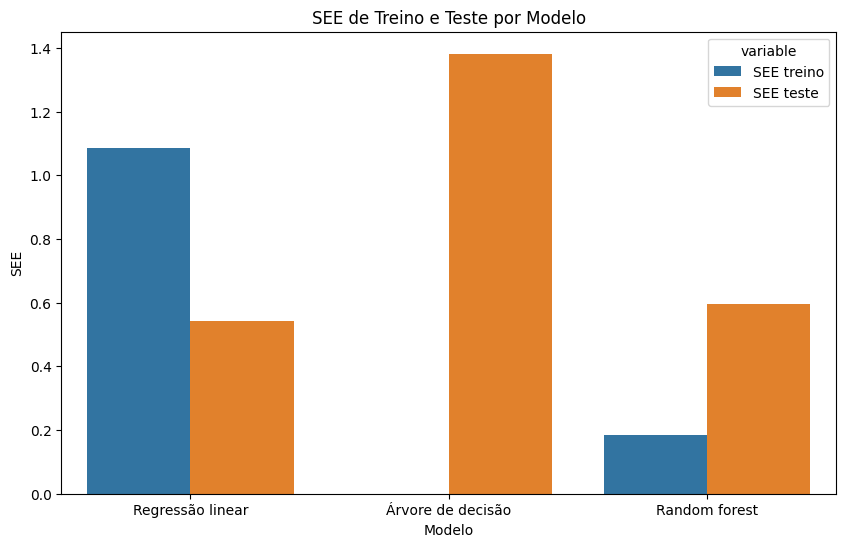

In [ ]:
# Gráfico de barras para SEE
# Prompt: crie um gráfico de barras único mostrando os
# valores de SEE de treino e de teste para cada modelo
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='value', hue='variable',
            data=pd.melt(tab_metricas, id_vars='Modelo',
                         value_vars=['SEE treino', 'SEE teste'])
            )
plt.title('SEE de Treino e Teste por Modelo')
plt.ylabel('SEE')
plt.show()

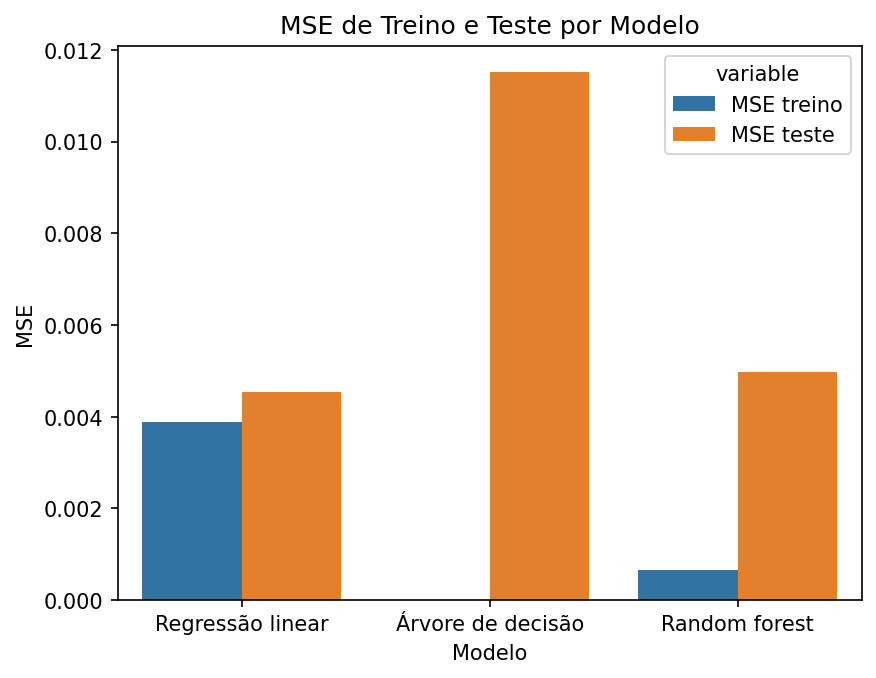

In [ ]:
plt.figure(dpi=150)
sns.barplot(x='Modelo', y='value', hue='variable',
            data=pd.melt(tab_metricas, id_vars='Modelo',
                         value_vars=['MSE treino', 'MSE teste'])
            )
plt.title('MSE de Treino e Teste por Modelo')
plt.ylabel('MSE')
plt.show()

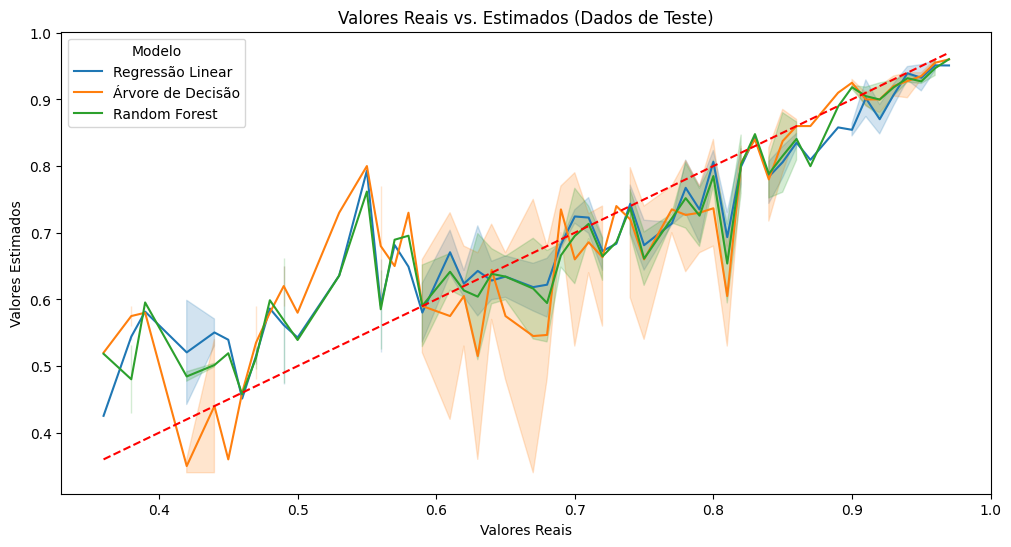

In [ ]:
# Criar um DataFrame para comparar os valores reais e previstos para o conjunto de teste
df_comparacao_teste = pd.DataFrame({
    'Real': y_teste,
    'Regressão Linear': previsao_rl_teste,
    'Árvore de Decisão': previsao_ad_teste,
    'Random Forest': previsao_rf_teste
})

# Derreter o DataFrame para facilitar a plotagem comparativa
df_comparacao_teste_melted = df_comparacao_teste.melt(id_vars='Real', var_name='Modelo', value_name='Estimado')

# Gerar um único gráfico de linha comparativo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Real', y='Estimado', hue='Modelo', data=df_comparacao_teste_melted)
plt.title('Valores Reais vs. Estimados (Dados de Teste)')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Estimados')
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], color='red', linestyle='--') # Linha de referência ideal
plt.show()